# Problem Statement -
# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# load dataset

In [55]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Renaming column names

In [56]:
df=df.rename(columns={'Marital.Status':'Marital_status', 'Taxable.Income':'Taxable_income', 'City.Population':'City_population',
       'Work.Experience':'Work_exp'})
df.head()

,Undergrad,Marital_status,Taxable_income,City_population,Work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [57]:
df.shape

(600, 6)

- dataset has 600 rows and 6 columns

In [58]:
#checking duplicate columns
df.columns

Index(['Undergrad', 'Marital_status', 'Taxable_income', 'City_population',
       'Work_exp', 'Urban'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_status   600 non-null    object
 2   Taxable_income   600 non-null    int64 
 3   City_population  600 non-null    int64 
 4   Work_exp         600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


- No Missing values and datatype also identified accuretly

In [60]:
# checking unique category in each column of dataset
df.nunique()

Undergrad            2
Marital_status       3
Taxable_income     599
City_population    598
Work_exp            31
Urban                2
dtype: int64

In [61]:
#for duplicated entries in dataset
df.duplicated().sum()

0

# outliers detecting and treatment

In [62]:
#lets check distribution of every column with help of describe function and boxplot
df.describe()

,Taxable_income,City_population,Work_exp
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


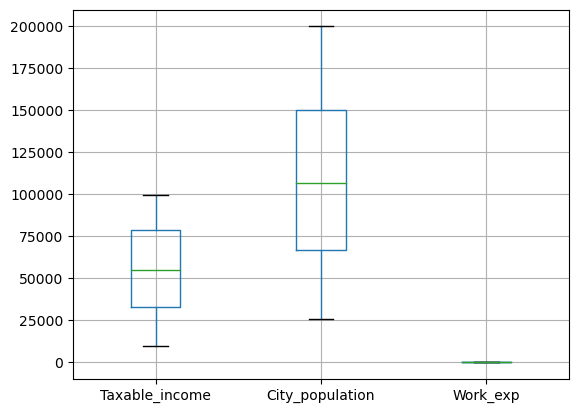

In [63]:
df.boxplot()
plt.show()

From the box plot we can understand that there are No outliers,
And distribution of taxable_income is slightly left skewed goes upto 1 lacs with a median approx of 58k with range of majority data is between 30 to 75k and

city_population is Right skewed, goes upto 2 lacs with median approx of 1 lac 15 thausand with range of majority data is between 70 to 1 lac 50 thausand 

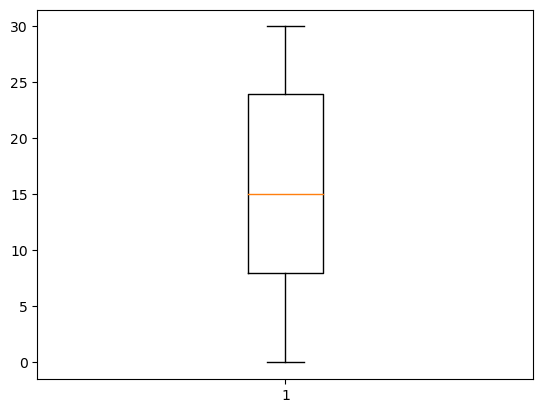

In [64]:
plt.boxplot(df.Work_exp)
plt.show();

- Work_exp feature is slightly left skewed.Distribution goes upto 30 years with median approx of 15 years with range of majority data is between 7 to 24 years.

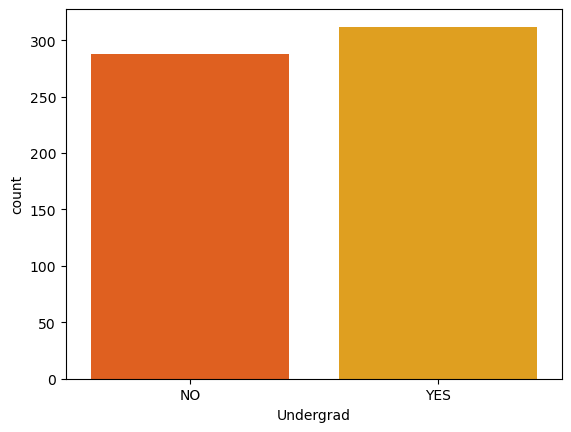

In [65]:
#Analysis for catagorical feature with count plot
sns.countplot(df['Undergrad'],palette='autumn')
plt.show()

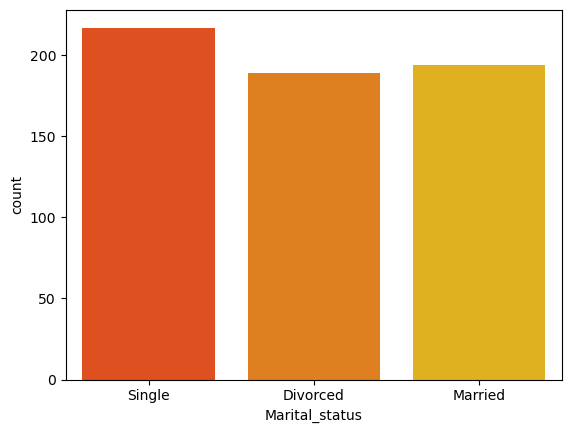

In [66]:
sns.countplot(df['Marital_status'],palette='autumn')
plt.show()

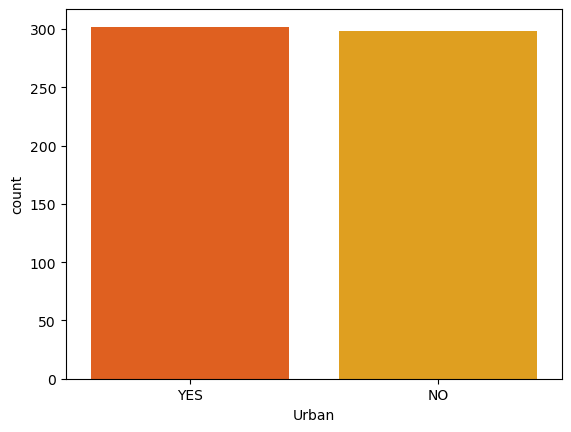

In [67]:
sns.countplot(df['Urban'],palette='autumn')
plt.show()

# Data Transformation

In [68]:
#checking skewness
df.skew()

Taxable_income     0.030015
City_population    0.125009
Work_exp           0.018529
dtype: float64

the skeweness of all columns are very low to treat.so we can neglect it

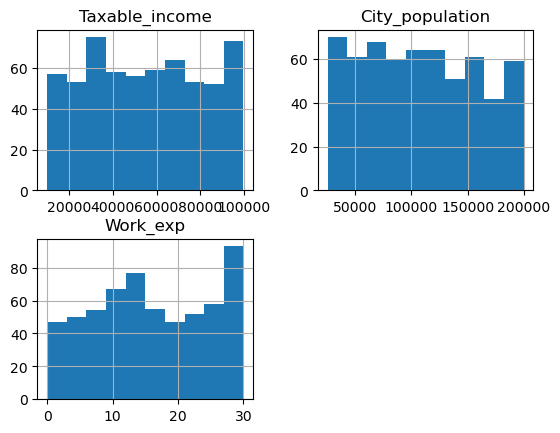

In [69]:
#lets check skewness visually
df.hist()
plt.show();

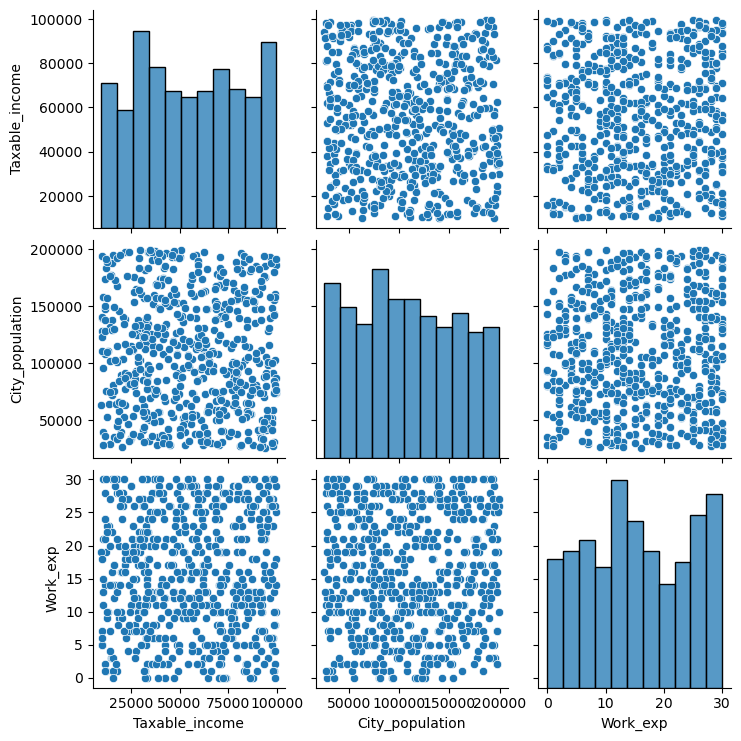

In [70]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df)
plt.show();

There is No relationship between Feature to Feature(No Multi-colinearity)

In [71]:
df.corr()

,Taxable_income,City_population,Work_exp
Taxable_income,1.000000,-0.064387,-0.001818
City_population,-0.064387,1.000000,0.013135
Work_exp,-0.001818,0.013135,1.000000


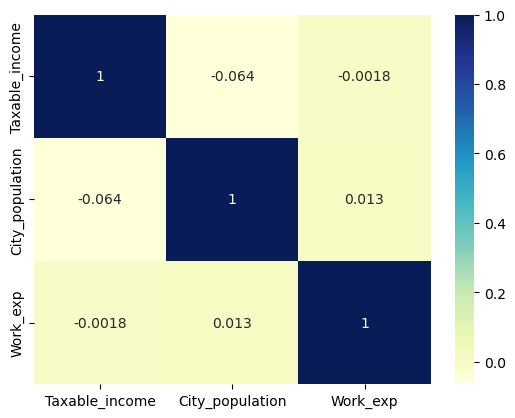

In [72]:
# Lets also check correlation by heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

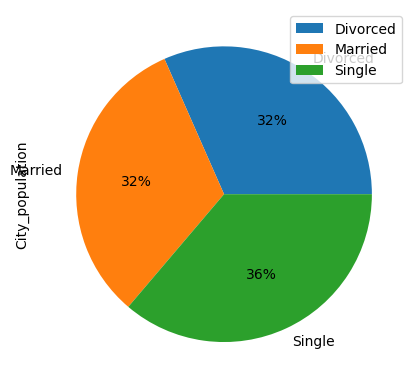

In [73]:
# lets do some analysis about columns
df.groupby(['Marital_status']).sum().plot(kind='pie', y='City_population',autopct='%1.0f%%')
plt.show();

From all city population single % is more and population of divorced and Married are distributed equally

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [74]:
df.loc[df['Taxable_income'] <= 30000, 'Taxable_income'] = 1 
df.loc[df['Taxable_income'] > 30000, 'Taxable_income'] = 0  
df['Taxable_income'].value_counts()

0    476
1    124
Name: Taxable_income, dtype: int64

In [75]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital_status']=label_encoder.fit_transform(df['Marital_status'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df

,Undergrad,Marital_status,Taxable_income,City_population,Work_exp,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


# dividing data into feature and target

In [76]:
X=df.drop(['Taxable_income'],axis=1)
y=df['Taxable_income']

In [77]:
X

,Undergrad,Marital_status,City_population,Work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_income, Length: 600, dtype: int64

In this module we create the independent and dependent feature, then split them into train and test data where training size is 70%. Later we collect all the numerical features and apply StandardScaler() function which transforms the distribution so that the mean becomes 0 and standard deviation becomes 1

# data transformation

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
y_train.value_counts()

0    336
1     84
Name: Taxable_income, dtype: int64

Using SMOTE technique to solve imbalance data to not cause biased problem during model training

In [82]:
from sklearn.ensemble import BaggingClassifier
bag_c = BaggingClassifier()

In [83]:
bag_m = bag_c.fit(X_train,y_train)

In [84]:
bag_m.score(X_test,y_test)

0.7444444444444445

In [85]:
bag_m.score(X_train,y_train)

0.9571428571428572

# Using SMOTE Technique

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [87]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=46)

In [89]:
y_res.value_counts()

0    336
1    336
Name: Taxable_income, dtype: int64

In [90]:
bag_c = BaggingClassifier()

In [91]:
bag_m1 = bag_c.fit(X_train,y_train)

In [92]:
bag_m1.score(X_test,y_test)

0.698019801980198

In [93]:
bag_m1.score(X_train,y_train)

0.9744680851063829

# Random Forest Classification

In [94]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [95]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=100, max_features=3,random_state=1)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.754367866549605


# Hyper-parameter tunning with Random Forest Classification

In [96]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, max_features=3,random_state=3)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.754367866549605


# AdaBoost Classification

In [97]:
num_trees = 50
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.754367866549605


# Voting Ensemble for Classification

In [98]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=100)
estimators.append(('logistic', model1))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model5 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_res, y_res, cv=kfold)
print(results.mean())

0.6947980684811238


# Bagged Decision Trees for Classification

In [99]:
seed = 10
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.7574626865671641


In [100]:
# creating new dataframe with all model accuracies
forest = pd.DataFrame({'Models': ['Random_forest','Adaboost','Votingclassifier','Bagg_Decision'],
                    'Accuracy': ['75.43','75.43','69.47','75.74']})
forest

,Models,Accuracy
0,Random_forest,75.43
1,Adaboost,75.43
2,Votingclassifier,69.47
3,Bagg_Decision,75.74
